Mean Squared Error: 3978.6436292026906


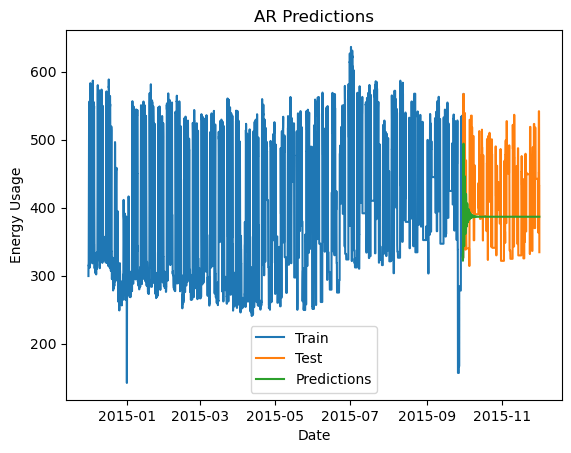

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error


# Read the data from CSV file
newData = pd.read_csv("Office_Garman.csv", index_col="timestamp", parse_dates=True)
# Remove duplicate entries
newData = newData.drop_duplicates()
# Set the frequency to hourly
newData = newData.asfreq('H')
# Fill missing values using forward fill method
newData = newData.fillna(method='ffill')

# Define the split date
split_date = '2015-09-30'

# Split the data into training and testing sets
train = newData.loc[:split_date]
test = newData.loc[split_date:]

# Define the lag order for the AR model
lag_order = 24  # Number of previous hours to consider for prediction

# Train the AR model
model = AutoReg(train, lags=lag_order)
model_fit = model.fit()

# Make predictions on the testing data
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate the model (if you have ground truth values for the testing set)
test_values = test['Office_Garman'].values
mse = mean_squared_error(test_values, predictions)
print(f"Mean Squared Error: {mse}")

import matplotlib.pyplot as plt

# Plot the actual data
plt.plot(train.index, train['Office_Garman'], label='Train')

# Plot the test data
plt.plot(test.index, test['Office_Garman'], label='Test')

# Plot the predictions
plt.plot(test.index, predictions, label='Predictions')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('AR Predictions')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [6]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test['Office_Garman'], predictions)

# Calculate MAPE
mape = mean_absolute_percentage_error(test['Office_Garman'], predictions)

# Calculate RMSE
rmse = mean_squared_error(test['Office_Garman'], predictions, squared=False)

# Print the calculated metrics
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)


MAE: 51.78106221941614
MAPE: 0.12326783382475534
RMSE: 63.07649030504702
